In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from colors import *

In [16]:
moderate_noisy = np.load('moderate_noisy.npy')
moderate_sg = np.load('moderate_sg.npy')
moderate_dip = np.load('moderate_dip.npy')
moderate_idf = np.load('moderate_idf.npy')

strong_noisy = np.load('strong_noisy.npy')
strong_sg = np.load('strong_sg.npy')
strong_dip = np.load('strong_dip.npy')
strong_idf = np.load('strong_idf.npy')

no_noisy = np.load('no_noisy.npy')
no_sg = np.load('no_sg.npy')
no_dip = np.load('no_dip.npy')
no_idf = np.load('no_idf.npy')

noisy = [moderate_noisy, strong_noisy, no_noisy]
sg = [moderate_sg, strong_sg, no_sg]
dip = [moderate_dip, strong_dip, no_dip]
idf = [moderate_idf, strong_idf, no_idf]

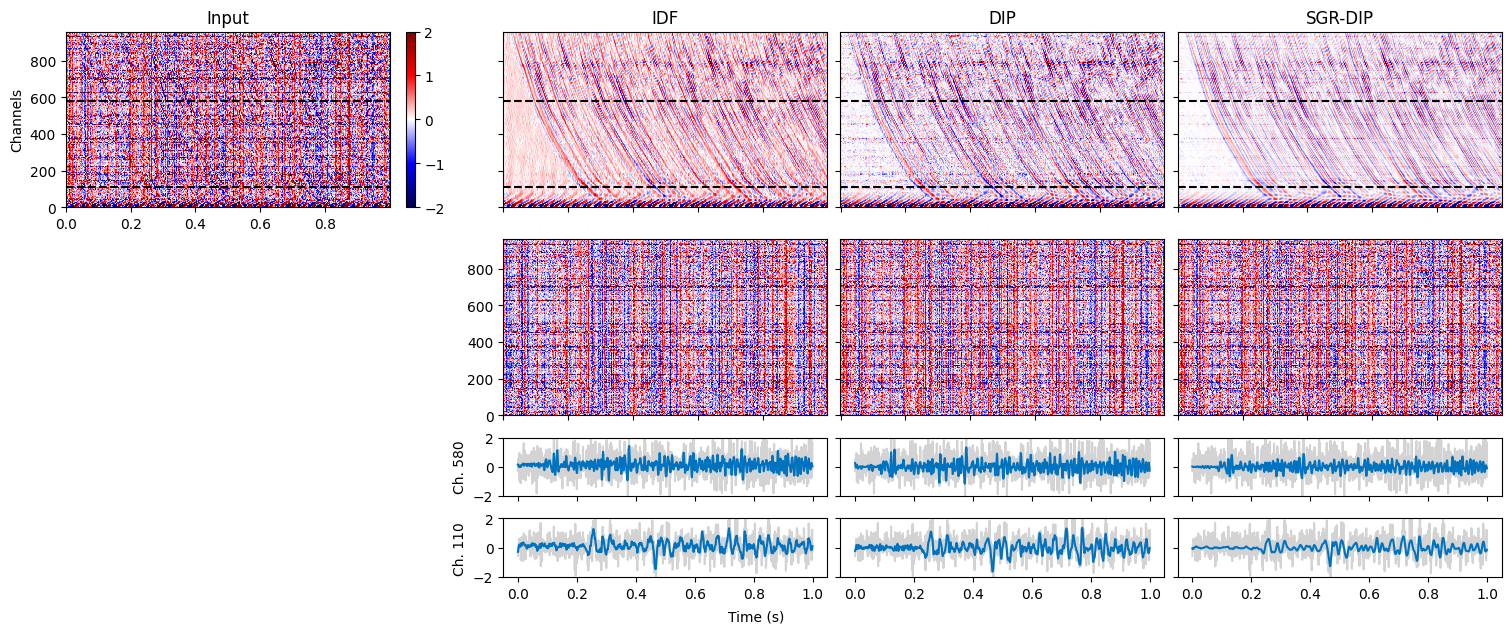

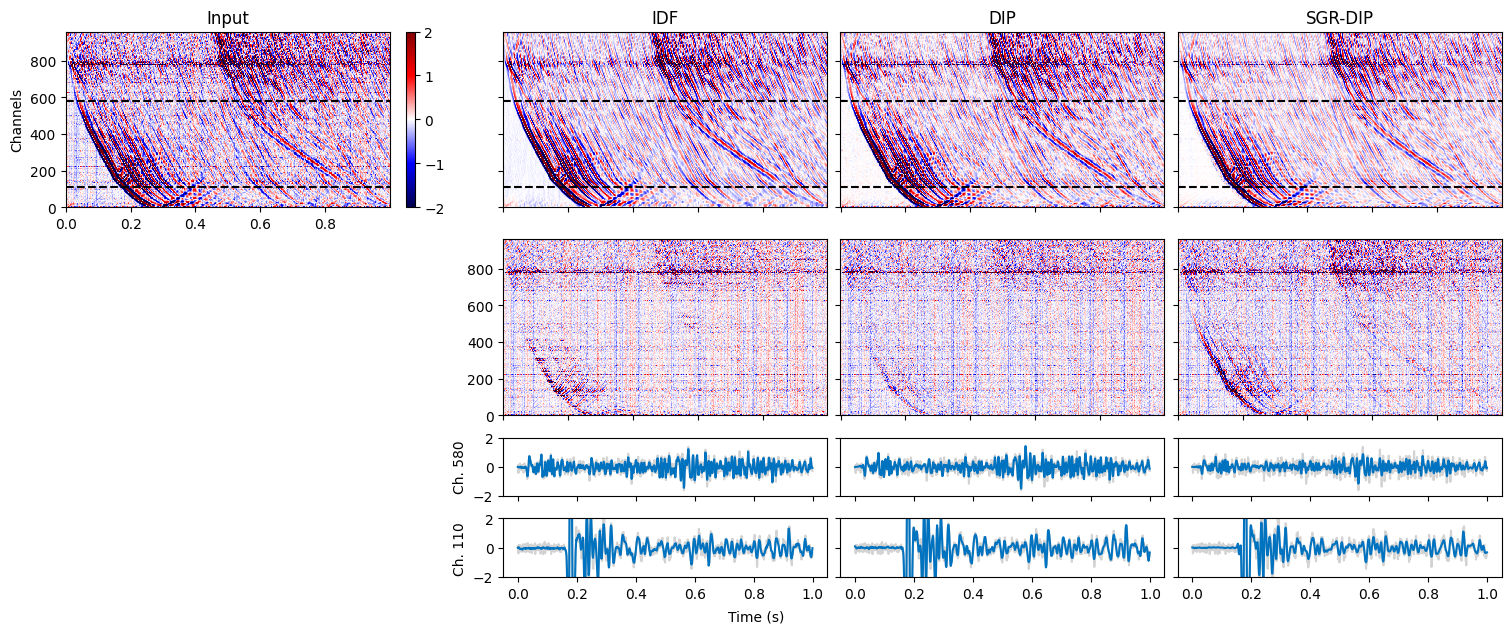

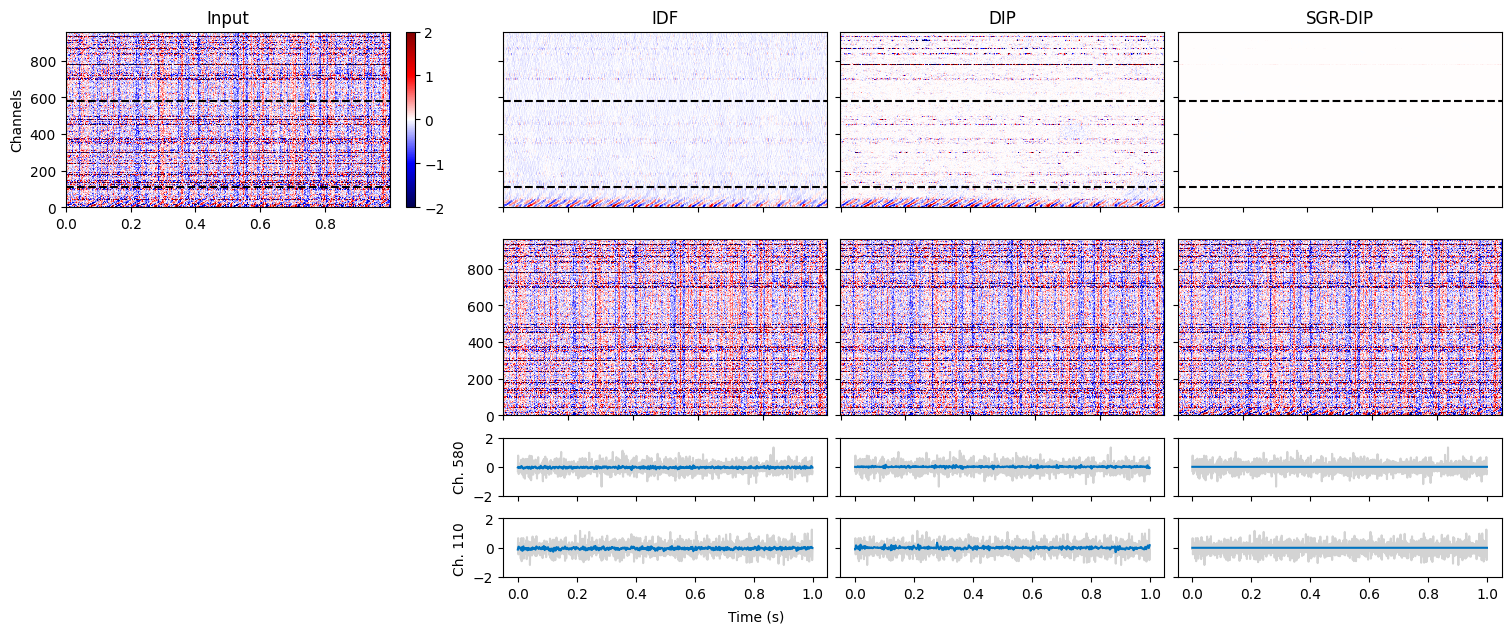

In [17]:
for i in range(3):
    fig, axs = plt.subplot_mosaic([
        ['a','a','a','b','b','b','c','c','c','d','d','d'],
        ['a','a','a','b','b','b','c','c','c','d','d','d'],
        ['a','a','a','b','b','b','c','c','c','d','d','d'],
        ['a1','a1','a1','b1','b1','b1','c1','c1','c1','d1','d1','d1'],
        ['a1','a1','a1','b1','b1','b1','c1','c1','c1','d1','d1','d1'],
        ['a1','a1','a1','b1','b1','b1','c1','c1','c1','d1','d1','d1'],
        ['a2','a2','a2','b2','b2','b2','c2','c2','c2','d2','d2','d2'],
        ['a3','a3','a3','b3','b3','b3','c3','c3','c3','d3','d3','d3'],
    ], layout='constrained', figsize=(15, 6))

    v = 2
    im = axs['a'].imshow(noisy[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['b'].imshow(idf[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['c'].imshow(dip[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['d'].imshow(sg[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['b1'].imshow(noisy[i] - idf[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['c1'].imshow(noisy[i] - dip[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)
    axs['d1'].imshow(noisy[i] - sg[i], origin='lower', interpolation='none', cmap='seismic', aspect='auto', vmin=-v, vmax=v)

    axs['a1'].set_visible(False)
    axs['a2'].set_visible(False)
    axs['a3'].set_visible(False)

    ch1 = 580
    ch2 = 110

    for s in ['a', 'b', 'c', 'd']:
        axs[s].axhline(ch1, ls="--", c='black')
        axs[s].axhline(ch2, ls="--", c='black')

    for j, ch in enumerate([ch1, ch2]):
        axs[f'b{j+2}'].plot(noisy[i][ch], c='lightgray')
        axs[f'b{j+2}'].plot(idf[i][ch], c=BLUE)
        axs[f'c{j+2}'].plot(noisy[i][ch], c='lightgray')
        axs[f'c{j+2}'].plot(dip[i][ch], c=BLUE)
        axs[f'd{j+2}'].plot(noisy[i][ch], c='lightgray')
        axs[f'd{j+2}'].plot(sg[i][ch], c=BLUE)

    axs['b2'].set_ylabel(f'Ch. {ch1}')
    axs['b3'].set_ylabel(f'Ch. {ch2}')

    for s in ['a','b','c','d','b1','c1','d1','b2','c2','d2','b3','c3','d3']:
        axs[s].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.1f}'))

    for s in ['b','c','d','b1','c1','d1','b2', 'c2','d2']:
        axs[s].set_xticklabels([])

    for s in ['b','c','d','c1','d1','c2','d2','c3','d3']:
        axs[s].set_yticklabels([])

    for s in ['b2','b3','c2','c3','d2','d3']:
        axs[s].set_ylim((-2,2))

    axs['a'].set_ylabel('Channels')

    # x_center = (axs['b'].get_position().x1 + axs['c'].get_position().x0) / 2
    # fig.text(x_center, -0.03, 'Time (s)', ha='center')
    fig.text(0.5, -0.02, 'Time (s)', ha='center', va='center')

    axs['a'].set_title('Input')
    axs['b'].set_title('IDF')
    axs['c'].set_title('DIP')
    axs['d'].set_title('SGR-DIP')

    plt.colorbar(im, location='right')
    plt.savefig(f'fig_6.4_{i+1}.png', bbox_inches='tight', dpi=200)
    plt.show()